# Week 3/4: Functions & Functional Programming

- Advanced Arguments
- Functional Programming
- Generators & Comprehensions
- Decorators

## Argument Types

Unless otherwise specified, function arguments are **required**, and can be passed either **by position** or **by name**.

As we will see, we can also make optional arguments, as well as arguments that can only be passed by position or by name.

In [22]:
def calculate_cost(items, tax):
    ...

calculate_cost(["salmon", "eggs", "bagels"], 0.05)   # items & tax passed by position

In [23]:
calculate_cost(["salmon", "eggs", "bagels"], tax=0.05) # tax passed by name for clarity

### Optional Arguments

Python allows default values to be assigned to function parameters.

Arguments with default values are not required.  Passed in values will override default.

In [19]:
# default arguments
def is_it_freezing(temp, is_celsius=False):
    if is_celsius:
        freezing_line = 0
    else:
        freezing_line = 32
    return temp < freezing_line

In [20]:
print(is_it_freezing(65))
print(is_it_freezing(30))
print(is_it_freezing(30, True))
print(is_it_freezing(-1, is_celsius=True))

False
True
False
True


You can have as many optional parameters as you wish, but they must all come after any required parameters.

In [11]:
def bad_function(a, b="spam", c):
    pass

SyntaxError: non-default argument follows default argument (3730094129.py, line 1)

### Argument Matching when Calling Functions

- Positional arguments are matched from left to right.
- Keywords matched by name.

In [13]:
# print() as an example [call help to see docstring]

help(print)

Help on built-in function print in module builtins:

print(*args, sep=' ', end='\n', file=None, flush=False)
    Prints the values to a stream, or to sys.stdout by default.
    
    sep
      string inserted between values, default a space.
    end
      string appended after the last value, default a newline.
    file
      a file-like object (stream); defaults to the current sys.stdout.
    flush
      whether to forcibly flush the stream.



In [ ]:
print("Something", "something else", "a third thing", sep=" & ", end="!")

### keyword-only and positional only arguments

Including a bare `*` as a parameter means everything after can only be passed by keyword.


For example:

In [ ]:
def request_page(url, verify, cache=True, send_cookies=False, https_only=True):
    pass

request_page("https://example.com", True, False, True, False)
# or was it 
request_page("https://example.com", True, send_cookies=False, https_only=False, cache=True)

In [ ]:
# instead
def request_page(url, *, verify, follow_redirects=False, cache=True, send_cookies=False, https_only=True):
    pass

In [ ]:
request_page("https://example.com", verify=True)

Including a bare `/` means everything beforehand is positional only:


In [25]:
# new in Python 3.8
def pos_only(a, b, /):
    print(a, b)

In [26]:
pos_only(a="hello", b="world")

TypeError: pos_only() got some positional-only arguments passed as keyword arguments: 'a, b'

In [29]:
min(1, 2)  # arguments to min are positional only, we don't need to know if they are a, b or x, y, or first, second

1

In [28]:
pos_only("hello", "world")

hello world


### Caveat: Mutable Default Arguments

The `def` line of a function is only evaluated once, not every time the function is called.

This can feel surprising at first, but important to understand & remember that only the inner-block of a function is executed on each call.

This is a common cause of bugs if a mutable is a part of the default arguments.

In [30]:
def add_many(item, n, base_list=[]):
    base_list.extend([item] * n)
    return base_list

In [33]:
# passing in a list for base_list works as expected...
animals = ["cow"]
add_many("bear", 3, animals)
add_many("fish", 5, animals)
print(animals)

['cow', 'bear', 'bear', 'bear', 'fish', 'fish', 'fish', 'fish', 'fish']


In [34]:
# let's invoke without a base_list parameter
animals2 = add_many("dog", 3)
print(animals2)

['dog', 'dog', 'dog']


In [35]:
animals3 = add_many("turtle", 4)
print(animals3)

['dog', 'dog', 'dog', 'turtle', 'turtle', 'turtle', 'turtle']


In [36]:
print(animals2)

['dog', 'dog', 'dog', 'turtle', 'turtle', 'turtle', 'turtle']


In [ ]:
animals2 is animals3

In [ ]:
# fixed version
def add_many(item, n, base_list=None):
    if base_list is None:
        base_list = []
    base_list.extend([item] * n)
    return base_list

In [37]:

# this usage takes advantage of the fact that the cache_dict is shared between calls
# this is fine to do if you're sure you know what you're doing.
# Since it is unexpected/tricky, should definitely be commented
def add_cached(x, y, cache_dict={}):
    if (x, y) not in cache_dict:
        print("did calculation", x, y)
        cache_dict[x, y] = x + y
    return cache_dict[x, y]

In [38]:
add_cached(4, 5)

did calculation 4 5


9

In [39]:
add_cached(6, 10)

did calculation 6 10


16

In [40]:
add_cached(4, 5)

9

### Variable Length Arguments

Sometimes we want a function that can take any number of parameters (seen above in `print`).

Collect arbitrary positional arguments with `*param_name`. (Often `*args`)

Collect arbitrary named arguments with `**param_name`. (Often `**kwargs`)

In [42]:
# *args example

def add_many(*args):
    total = 0
    for num in args:
        total += num
    return total

In [43]:
add_many(1, 2, 3)

6

In [46]:
# **kwargs example

def show_table(**kwargs):
    for name in kwargs:
        print(f"{name:>10} | {kwargs[name]}")
        
# Using advanced string formatting, see https://docs.python.org/3/library/string.html#formatstrings

In [45]:
show_table(spam=100, eggs=12, other=42.0)

      spam | 100
      eggs | 12
     other | 42.0


### When should you use defaults, name-only, positional-only?

Your function provides an "interface" for other programmers to interact with.

Proper choices help others understand how to call your functions and should be chosen to make things easier for others.

(Note: sometimes "other programmers" just just "future you", but that person will appreciate it just as much as your colleagues)

### Discussion


- What types are `args` and `kwargs`?
- When would you use `*args`? `**kwargs`?
- What would `func(*args1, *args2)` do?
- f,g,h,k examples


In [ ]:
# two required args
def f(x, y):
    print(f"{x=} {y=}")

In [ ]:
f(1, 2)

In [ ]:
f(1)

In [ ]:
# a default argument
def g(x, y=3):
    print(f"{x=} {y=}")

In [ ]:
g(1)

In [ ]:
g(1, 2)

In [ ]:
# all default args
def h(x="abc", y=3, z=True):
    print(f"{x=} {y=} {z=}")

In [ ]:
h()

In [ ]:
h(1)

In [ ]:
h(z=False)

In [ ]:
h(3, x=1)

In [ ]:
h(3, y="xyz")

In [ ]:
# args, kwargs, and positional args
def j(x, *args, y=3, **kwargs):
    print(f"{x=} {y=} {args=} {kwargs=}")

In [ ]:
j(1, 2, 3, 4, 5, 6, y=4)

In [ ]:
j(foo=3)

In [ ]:
j(1, foo=3)

In [ ]:
j(x=1, foo=3)

In [ ]:
j(1, 2, 3, 4, x=5, z=10)

### Unpacking/Splatting

`*` and `**` are also known as unpacking or splatting operators.

When in a function signature, they coalesce arguments into a `tuple` and `dict` as we've seen.

When used on a parameter when calling a function, they "unpack" the values from a sequence or dict.

In [48]:
def takes_many(a, b, c, d):
    print(f"{a=} {b=} {c=} {d=}")

three = ["A", "B", "C"]
four = (1, 2, 3, 4)
five = (False, False, False, False, False)

In [52]:
takes_many(*three, d="X")

a='A' b='B' c='C' d='X'


In [53]:
takes_many(*four)

a=1 b=2 c=3 d=4


In [54]:
takes_many(*five)

TypeError: takes_many() takes 4 positional arguments but 5 were given

In [55]:
# double-splat
keywords = {"a": "sun", "b": "moon", "c": "venus", "d": "mars"}
takes_many(**keywords)

a='sun' b='moon' c='venus' d='mars'


In [56]:
import math


def distance(x1, y1, x2, y2):
    """
    Find distance between two points.
    
    Inputs:
        point1: 2-element tuple (x, y)
        point2: 2-element tuple (x, y)

    Output: Distance between point1 and point2 (float).
    """
    return math.sqrt(math.pow(x2-x1, 2) + math.pow(y2-y1, 2))

In [4]:
# we can use sequence-unpacking to turn tuples/lists into multiple arguments
a = (3, 4)
b = [5, 5]
distance(*a, *b)

2.23606797749979

## Functional Programming

The style of programming we've been doing is called **imperative** or **procedural**.  Statements run in sequence and change a program's state.

As we said early on, Python is multi-paradigm.  

> "[...] practicality beats purity."
> 
> - The Zen of Python

Languages like LISP, Haskell, Racket are purely functional & differ significantly from procedural & object-oriented languages.

Python has many features that stem from pure functional languages & support functional programming.

### Functions are "first-class objects"

A key feature of Python that makes it possible to write code in the functional style is the fact that functions are objects. (Everything in Python is an object.)

This means functions don't have special rules about how they can be used, any variable can reference a function. (Remember, a variable is an association between a name & object.)

In [15]:
def echo(message):
    print(message)
    print(message)
    
print(f"echo = {echo}")
print(f"type(echo) = {type(echo)}")

echo = <function echo at 0x104e9c7c0>
type(echo) = <class 'function'>


In [16]:
# we can assign other names to objects, including functions

x = echo

x("hello")

hello
hello


In [ ]:
# we can also store functions in other types

func_list = [print, echo, print, echo]
for i, func in enumerate(func_list):
    func(i)

In [ ]:
# dictionaries too
func_mapping = {False: print, True: echo}

print_twice = True
func_mapping[print_twice]("twice")

print_twice = False
func_mapping[print_twice]("once")

In [60]:
# we can pass functions into other functions

def add(a, b):
    return a + b

def sub(a, b):
    return a - b

def perform_op(op_func, a, b):
    return op_func(a, b)

print("add, 3, 4 = ", perform_op(add, 3, 4))
print("sub, 3, 4 = ", perform_op(sub, 3, 4))

add, 3, 4 =  7
sub, 3, 4 =  -1


In [ ]:
# and we can return functions from other functions

def get_op(name):
    if name == "div":
        def f(a, b):
            return a / b
    elif name == "mod":
        def f(a, b):
            return a % b
    return f

In [ ]:
div = get_op("div")
perform_op(div, 10)

In [58]:
x = [("Nick", 1), ("Yusong", 9), ("Emma", 100)]

def negate(y):
    return -y

x.sort(key=lambda item: item[1])
print(x)

#x.sort(key=negate)
#print(x)

[('Nick', 1), ('Yusong', 9), ('Emma', 100)]


### lambda functions

Python also provides another way to generate function objects.

These are called lambda functions (aka anonymous functions), which:

- Are expressions that return a function object that can be called later without providing a name (hence ``anonymous")
- Can be used in places where def statement is not syntactically legal (inside a literal list, inlined as a function argument, etc.)

The body of an lambda function is a single expression, not a block of statements.  The body is similar to a return statement in a def statement.

```python

lambda arg1, arg2: expression

# essentially the same as

def __(arg1, arg2):
    return expression
```

(0 or more arguments, but *must* have an expression)

### Aside: expresssions vs. statements

Everything in Python is either an expression or a statement. 

An expression evaluates to a value, examples include:

* `42`
* `"hello world"`
* `10 * 5`
* `f(1, 2, 3)`
* `[1, 2, 3]`
* `l[0]` 
* `lambda arg1, arg2: arg1 + arg2`

Notice that all of these could be found on the right hand side of an assignment (e.g. `x = 10 * 5`)

Expresssions are valid in assignment, function calls, sequence values, etc.  (Anywhere a value is needed.)

```
# in assignment
x = 42
x = 10 * 5
x = [1, 2, 3]

# in function calls
f(42)
f(10 * 5)
f([1, 2, 3])

# in complex types
[42, [1, 2, 3], lambda x: x**2]
{10*5: f(10, 5)}
```

To contrast, statements perform an action.

* `x = 1`
* `if x: ...`
* `def f(a): ...` 
* `import math`

They are prohibted where types are required:

```
 # not allowed
x = if y > 0: 
   7

z = def f(a): 
   ...
```

A statement will often have multiple expressions within it. Many statements (but not all) use indented blocks.

When it comes to `lambda`:
* a `lambda` defines a function that maps input to a single expression, `def` can be used if more was needed
* a `lambda` is itself an expression, it can be used anywhere other expresssions are needed

In [59]:
# can fit places a function definition can't
# such as being used as a parameter
perform_op(lambda a, b: a * b, 5, 6)

NameError: name 'perform_op' is not defined

In [ ]:
# can be assigned to a variable
mul = lambda a, b: a * b
mul(5, 6)

# same as
def mul(a, b):
    return a * b

General rule: If you're giving a lambda a name, use a function.

In [ ]:
# common use case
names = ["adam", "Ziwe", "Bo", "JENNY"]
names.sort()
print(names)  # case sensitive, lower-case a comes after Z

In [ ]:
names.sort(key = lambda item: item.lower())
print(names)

### Functional Methods

Python also has several built in methods that are useful when writing programs with a functional mindset.

`map`, `filter`, `functools`

#### `map(function, iterable1, [...iterableN])`

Returns a new iterable that calls `function` with parameters from `iterable1 ... iterableN`.

In [ ]:
def add_two(x):
    return x + 2

for x in map(add_two, [1, 2, 3]):
    print(x)

In [ ]:
# commonly used with lambdas

for x in map(lambda x, y: x * y, ("A", "B", "C"), (1, 2, 3)):
    print(x)

In [ ]:
# operator module contains all of the common operators
import operator

operator.sub(20, 5)


In [ ]:
list(map(operator.sub, [20, 19], [10, 9]))

In [ ]:
# the result of `map` is an iterable

# possible to pass into set or list 
#  or anywhere you can pass an iterable
set(map(lambda x: x * 3, ("A", "B", "C")))

#### `filter(function, iterable)` 

returns an iterable that contains all items from iterable for which `function(item)` returns True

In [ ]:
list(map(lambda s: s.title(), filter(str.isupper, ["a", "ABC", "AbCdeF", "XYZ"])))

In [ ]:
g = (x**2 for x in filter(lambda x: x % 2 != 0, range(20)))
list(g)

#### functools

In [ ]:
import functools
[name for name in dir(functools) if name[0].islower()]

``functools.reduce(function, iterable[, initializer])``

Apply ``function`` to pairs of items successively and return a single value as the result. You can optionally specify the initial value.


In [ ]:
import functools 
import operator 

#accumulator = 0
#for item in my_list:
#    accumulator += item

# 1st iteration: Call operator.add(1,2) -> 3 
# 2nd iteration: Call operator.add(3,3) -> 6 
# 3rd iteration: Call operator.add(6,4) -> 10 
# final result = 10 
functools.reduce(operator.add, [1,2,3,4])

functools.reduce()

In [ ]:
names = ["Ben", "Martha", "Susan"]
# 1st iteration: call f(0, "Ben") -> 0 + len("Ben") -> 3
# 2nd iteration: call f(3, "Martha") -> 3 + len("Martha") -> 9
# 3rd iteration: call f(9, "Susan") -> 9 + len("Susan") -> 14
functools.reduce(lambda a, b: a + len(b), names, 0)

In [ ]:
# What happens if you pass in an initial value 
# 1st iteration: Call operator.mul(2,1) -> 2 
# 2nd iteration: Call operator.mul(2,2) -> 4 
# 3rd iteration: Call operator.mul(4,3) -> 12 
# 4th iteration: Call operator.mul(12,4) -> 48 
# Final result = 48 
functools.reduce(operator.mul, [1,2,3,4], 0)

```functools.partial(func, *args, **kwargs)```

`functools.partial` returns a new function that "binds" any passed args & kwargs, and leaves other parameters unbound.

In [1]:
import operator
operator.mul(2, 10)

20

In [3]:
import functools
double = functools.partial(operator.mul, 2)

double(4)

8

In [4]:
def calls_twice(f):
    print(f())
    print(f())
    

g = functools.partial(operator.mul, 4, 4)
print(g())
#calls_twice(g)

16


In [7]:
print_ex = functools.partial(print, "x", sep="!")
print_ex("a", "b", "c", sep="?")

x?a?b?c


In [ ]:
def request_page(url, verify, cache=True, send_cookies=False, https_only=True):
    pass

secure_request = functools.partial(request_page, verify=True, https_only=True)

## Generators & Comprehensions

### Generator Functions

A generator function works differently from all of the functions we've seen before.  It allows the function to return (using the `yield` statement) and resume where it left off, with internal state intact.

Between calls to the generator function, state is suspended.

In [ ]:
def simple_generator():
    print("entered")
    yield 1
    print("still inside")
    yield 2
    print("almost done")
    yield 3

In [ ]:
simple_generator()

In [ ]:
for x in simple_generator():
    print(x)

In [ ]:
def evens_up_to(n): 
    for i in range(2, n + 1):
        if i % 2 == 0:
            yield i

In [ ]:
for evens in evens_up_to(10):
    print(evens)

In [ ]:
# Generators do not have to ever exit, here is an infinite generator
def powers_of_two():
    n = 2
    while True:
        yield n
        n *= 2

In [ ]:
for x in powers_of_two():
    if x > 100:
        break
    print(x)

In [ ]:
g = powers_of_two()

In [ ]:
next(g)

In [ ]:
r = range(100)
print(r)

### Discussion: Benefits of Generators

- Avoids creating entire collections up front.

- Can result in drastic memory savings.

    - How much memory does `range(100000)` need?

- Avoids doing expensive computations until necessary.

### Generator Expressions & Comprehensions

Creates a generator that yields `expression` for each iteration of the for loop. (Optionally only if the `condition` is satisfied)


```python
g = (expression for var in iterable)

# or 

g = (expression for var in iterable if condition)

# functionally equivalent to:

def g():
    for var in iterable:
        if condition:
            yield expression
```

In [ ]:
evens_generator = (i * 2 for i in [1,2,3,4,5])
print(evens_generator)

In [ ]:
# can be used just like other generators we've seen (as an iterable)
for i in evens_generator:
    print(i)

In [ ]:
# also possible to specify conditionals in generator expression
evens_generator2 = (i for i in range(10) if i % 2 == 0)

In [ ]:
for i in evens_generator2:
    print(i)

In [ ]:
g = (i * 2 for i in [1,2,3,4,5])
print(g)


### List Comprehensions

Generate a new list from an existing iterable.

Same syntax as generator expression but inside `[]`:

```python
new_list = [expression for var in iterable]

# or 

new_list = [expression for var in iterable if condition]
```

In [ ]:
powers_of_two = [2 ** n for n in range(10)]
print(powers_of_two)

In [ ]:
# possible to nest comprehensions, but beware readability
faces = ("K", "Q", "J")
suits = ("♠", "♣", "♦", "♥")
cards = [(face + suit) for face in faces for suit in suits if face != "K"]
print(cards)

### Set & Dict Comprehensions

Also possible to make `set` and `dict` comprehensions by using `{}`.

In [ ]:
powers_of_two_set = {2 ** n for n in [1,1,2,2,3,3,3,4,4,4]}
print(powers_of_two_set)

In [ ]:
powers_of_two_mapping = {n: func(n) for n in range(5) if n > 0}
print(powers_of_two_mapping)

### Generators vs. Comprehensions

- Generators produce one result at a time, typically more efficient in terms of memory.
- Comprehensions are useful if you need to keep the results around / reuse them at all.

In [ ]:
RED = (255, 0, 0)

def paint(color):
    coordinate = (100, 100)
    ...

# How many globals? 
# How many locals inside paint?

In [ ]:
# where does print come from?
# list, set, dict, int, str, etc.

In [8]:
for name in dir(__builtins__):
    if name[0].islower():
        print(name)

abs
aiter
all
anext
any
ascii
bin
bool
breakpoint
bytearray
bytes
callable
chr
classmethod
compile
complex
copyright
credits
delattr
dict
dir
display
divmod
enumerate
eval
exec
execfile
filter
float
format
frozenset
get_ipython
getattr
globals
hasattr
hash
help
hex
id
input
int
isinstance
issubclass
iter
len
license
list
locals
map
max
memoryview
min
next
object
oct
open
ord
pow
print
property
range
repr
reversed
round
runfile
set
setattr
slice
sorted
staticmethod
str
sum
super
tuple
type
vars
zip


## Scope
The location of an object in code determines the scope of where it is accessible via code.

We've dealt with two types of scope so far:

- module scope (Global)

- function scope (Local)

### Scope Rules

Assignment statements create or change local names by default.

Referencing a name follows LEGB:

    - Local: Scope of the function.
    - Enclosing: Scope of any enclosing functions.
    - Global: Scope of the file.
    - Built-in: Built-ins.

If none are found, an exception is raised.

#### `global` and `nonlocal`

Allow us to modify variables in non-local scopes.

Minimize use, as they make code harder to follow.

In [9]:
## Without global declaration 
x = 2
def f():
    x = 2
    x += 1
    print(x) # prints: 3
f() 
print(x) # global scope x was not modified

3
2


In [10]:
## With global declaration 
x = 2
def f():
    global x
    x += 1
    print(x) # prints: 3
f() 
print(x) # global scope x was modified

3
3


### Nested Functions

We've seen an example before, we can define functions within functions.

In [11]:
def f1():
    def f2():
        print("inside f2")
    print("inside f1")
    f2()

In [12]:
f1()

inside f1
inside f2


#### Closures

When a function is nested inside another function, it remembers the enclosing scope for our LEGB lookup.

The combination of a nested function and its enclosing scope is called a closure.

In [16]:
def make_func(n):
    y = 3
    def f(x):
        # n: locally scoped to make_func() < enclosing scope
        # x: locally scoped to f()
        # we are using the n from the enclosing scope
        return x ** n + y 
    return f

In [17]:
to_the_third = make_func(3)
to_the_third(10)

1003

In [ ]:
squared = make_func(2)
squared(10)

In [18]:
import math

def make_cached_calc():
    prior_calls = {}
    
    def calc(x, y):
        if (x, y) not in prior_calls:
            print(f"doing computation on {x} and {y}...")
            # do computation
            answer = math.sin(x) + math.exp(y)
            # save to cache
            prior_calls[x, y] = answer
        
        # retrieve from cache
        return prior_calls[x, y]
    
    return calc

add = make_cached_calc()

In [19]:
add(1, 2)

doing computation on 1 and 2...


3

In [20]:
add(1, 2)

3

In [23]:
add2 = make_cached_calc()
add2(1, 2)

doing computation on 1 and 2...


3

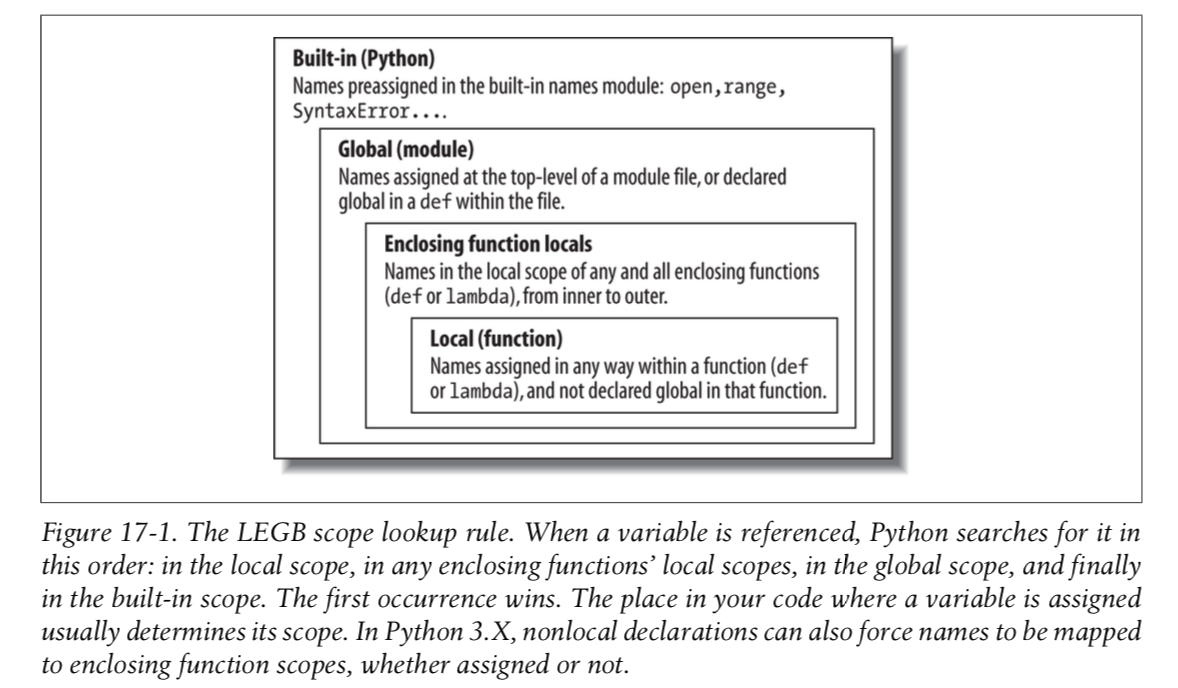

-- Learning Python, 2013

## Decorators

A common pattern in functional programs, are functions that are built to "wrap" other functions.

In [28]:
def print_before_and_after(func):
    def newfunc(*args, **kwargs):
        print("BEFORE", func)
        func(*args, **kwargs)
        print("AFTER", func)
    return newfunc

In [29]:
def inner():
    print("inner function")

In [30]:
wrapped_inner = print_before_and_after(inner)

wrapped_inner()
#print(x)

BEFORE <function inner at 0x1048bc790>
inner function
AFTER <function inner at 0x1048bc790>


In [31]:
# often we want to just replace the function altogether
# with the modified version
inner = print_before_and_after(inner)
inner()

BEFORE <function inner at 0x1048bc790>
inner function
AFTER <function inner at 0x1048bc790>


In [32]:
# another way of writing this is to use decorator syntax
@print_before_and_after
def add_nums(a, b, c):
    print(f"{a} + {b} + {c} =", a + b + c)

In [33]:
add_nums(1, 2, 3)

BEFORE <function add_nums at 0x1048bde10>
1 + 2 + 3 = 6
AFTER <function add_nums at 0x1048bde10>


In [35]:
def cache(func):
    inner_cache = {}
    
    def newfunc(*args, **kwargs):
        if args not in inner_cache:
            inner_cache[args, kwargs] = func(*args, **kwargs)
        return inner_cache[args]
    
    return newfunc

In [36]:
@cache
def expensive_calculation(a, b, c, d, e, f):
    print(f"doing expensive calculation on {a} {b}...")
    return a ** b

@cache
def cheap_calculation(a, b):
    print(f"doing cheap calculation on {a} {b}...")
    return a + b

In [37]:
expensive_calculation(4, 10)

doing expensive calculation on 4 10...


1048576

In [38]:
cheap_calculation(4, 10)

doing cheap calculation on 4 10...


14

In [39]:
expensive_calculation(5, 6)

doing expensive calculation on 5 6...


15625

In [ ]:
cheap_calculation(1, 10)

In [40]:
expensive_calculation(5, 6)

15625

In [42]:
def repeat5(func):                     # the decorator   
    def newfunc(*args, **kwargs):      # the inner function
        for i in range(5):
            func(*args, **kwargs)
    return newfunc

@repeat5       # the wrapped function
def print_sum(*args):
    print(sum(args))

In [43]:
print_sum(1, 2, 3, 4)

10
10
10
10
10


In [47]:
# to make a decorator that takes additional arguments
# you need to write a decorator factory function that returns decorators

def repeat(n):                                   # factory: takes integer, returns decorator
    def repeat_decorator(func):                  # decorator: takes function, returns function
        def newfunc(*args, **kwargs):            # inner function: takes ?, returns ?
            for i in range(n):
                func(*args, **kwargs)
        return newfunc
    return repeat_decorator

@repeat(10)
def print_backwards(s):
    print("backwards")

print_backwards("backwards")

cow fox dog
cow fox dog
cow fox dog
cow fox dog
cow fox dog
cow fox dog
cow fox dog
cow fox dog
cow fox dog
cow fox dog


In [ ]:
repeat_10 = repeat(10)
print(repeat_10)
print_backwards = repeat_10(print_backwards)
print_

In [ ]:
# Example: writing our own `partial`
# https://docs.python.org/3/library/functools.html#functools.partial

In [48]:
import functools
print_hello_names = functools.partial(print, "Hello", sep=", ")

In [49]:
print_hello_names("Scott", "Paul", "Lauren")

Hello, Scott, Paul, Lauren


In [50]:
print_hello_names.args

('Hello',)

In [51]:
print_hello_names.keywords

{'sep': ', '}

In [52]:
print_hello_names.func

<function print>

In [ ]:
# since functions are objects, we can attach arbitrary values to them
def wrapper(func):
    def newfunc(*args, **kwargs):
        return func(*args, **kwargs)
    # we can do whatever we like after defining newfunc, but before returning it
    newfunc.is_wrapped = True
    return newfunc

In [ ]:
# property is assigned to all wrapped functions
@wrapper
def our_function():
    print("inside our function")

our_function.is_wrapped

In [ ]:
def our_partial(func, /, *args, **keywords):
    def newfunc(*fargs, **fkeywords):
        newkeywords = {**keywords, **fkeywords}
        return func(*args, *fargs, **newkeywords)
    # assign these properties from within the closure
    newfunc.func = func
    newfunc.args = args
    newfunc.keywords = keywords
    return newfunc

In [ ]:
print_hello_names2 = our_partial(print, "Hello", sep=", ")
print_hello_names2("Scott", "Paul", "Lauren")

In [ ]:
print_hello_names2.args

In [ ]:
print_hello_names2.keywords

In [ ]:
print_hello_names2.func